比赛：https://www.kaggle.com/c/dont-overfit-ii

In [36]:
import zipfile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn
import d2lzh as d2l

%matplotlib inline

root = 'E:/Data/Kaggle'
dataDir = f'{root}/dont-overfit-ii'
Z = zipfile.ZipFile(f'{dataDir}.zip')
Z.extractall(dataDir)

trainset = pd.read_csv(f'{dataDir}/train.csv', index_col='id')
testset = pd.read_csv(f'{dataDir}/test.csv', index_col='id')
submit = pd.read_csv(f'{dataDir}/sample_submission.csv')

In [9]:
trainset.head()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [10]:
trainset.shape

(250, 301)

训练数据集包括 250 个样本、300 个特征和 1 个标签。我们将所有的训练数据和测试数据的 300 个特征按样本连结。

In [55]:
all_features = pd.concat((trainset.iloc[:, 1:], testset), sort=False)

## 预处理数据

我们对连续数值的特征做标准化（standardization）：设该特征在整个数据集上的均值为 $\mu$，标准差为 $\sigma$。那么，我们可以将该特征的每个值先减去 $\mu$ 再除以 $\sigma$ 得到标准化后的每个特征值。对于缺失的特征值，我们将其替换成该特征的均值。

In [56]:
all_features = all_features.apply(lambda x: (x - x.mean()) / (x.std()))

In [94]:
n_train = trainset.shape[0]
train_features = nd.array(all_features[:n_train].values)
test_features = nd.array(all_features[n_train:].values)
train_labels = nd.array(trainset.target.values)

In [95]:
loss = gloss.SoftmaxCrossEntropyLoss()

def get_net():
    net = nn.Sequential()
    net.add(nn.Dense(2))
    net.initialize()
    return net

In [96]:
batch_size = 8
net = get_net()
learning_rate = 1e-3
train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
trainer = gluon.Trainer(net.collect_params(), 'adam', {
        'learning_rate': learning_rate, 'wd': weight_decay})

In [104]:
for epoch in range(num_epochs):
    for X, y in train_iter:
        with autograd.record():
            l = loss(net(X), y).mean(0)
        l.backward()
        trainer.step(1)
        print(l.asscalar())

0.00021307077
8.104004e-05
0.00024977166
0.00018385702
0.00020329708
0.0001797974
0.00018042688
0.00035536854
0.00013434522
0.00017366513
0.00025590768
0.00022363654
9.517875e-05
0.00013822119
9.353477e-05
0.00023785792
0.00019568502
0.00019540566
0.0002432352
9.5507705e-05
0.0001004535
0.00029748524
0.000114057235
0.00018127046
0.00012269217
0.00024629565
0.00022633756
0.00015275541
0.00017920799
0.00012415544
0.00010393841
8.040021e-05
0.00014176693
0.0001356509
0.0002245555
0.00015366741
0.00018176237
0.0002561209
0.00024239068
0.00015699411
0.00010593159
8.931885e-05
0.00011211804
0.00020355839
0.00015416527
0.00016278538
0.0002556292
0.00021668889
0.00022840752
0.00021390371
8.914192e-05
0.00029650854
8.3928186e-05
0.00013656502
0.00021070727
0.0001262117
0.000119161974
0.00018321196
0.0001630808
0.00020376801
0.00028030586
0.00021041559
0.00019714904
8.546598e-05
0.00019381632
0.00014878905
0.00015420398
0.00016808884
0.00030181228
8.905541e-05
0.00010774877
0.00010775342
0.00016

0.00014702081
0.00012521233
0.0002551415
0.00015055937
7.381529e-05
0.00017695162
0.00021214123
7.98018e-05
0.000101332305
0.00017348405
0.00014964926
0.0001478822
0.00022894384
0.00014983928
0.00012481475
0.00015413183
0.00018422121
0.00019177825
0.00018901916
0.00010996366
0.00017258851
9.486162e-05
0.00021060609
0.00015647021
0.00010659318
0.00010525044
0.000109200926
0.000142826
0.0001911006
0.00017874147
0.00038597954
0.00010991296
0.00020533509
0.00019525611
0.00012616997
0.00016751922
0.00010226644
0.00021512122
0.00010695294
0.00024866182
0.00012457198
0.00020186653
0.00020622519
0.00010076557
0.0001962456
9.288231e-05
0.00012262358
0.00017598222
0.00017967244
0.00015395164
0.0002011522
7.552905e-05
0.00010754503
0.00014824563
0.00014767968
0.00013511004
0.00021255799
4.9838505e-05
0.00014719991
0.00013094647
0.00013123272
0.00023219945
5.989908e-05
0.00021426265
0.00019404976
0.00020681095
0.00021294267
0.00016990963
0.00022023116
8.677897e-05
0.00016066228
0.00014999532
0.000

0.00016748393
3.345039e-05
0.00010429565
0.0001365847
9.762299e-05
0.00018097773
9.2259965e-05
9.872824e-05
0.00010144903
0.00012813575
0.00012703451
0.00022882223
0.00014927269
0.0001337513
0.00015046388
0.00014093082
0.00010706183
0.000105384126
0.00012464295
0.00014714459
6.504001e-05
8.8806504e-05
0.00011965251
7.7627235e-05
6.125341e-05
0.00013978385
7.195311e-05
0.00011538489
0.00012552201
0.00012284955
0.00018148562
0.00011224346
0.00022142683
0.00023229126
0.000119064665
0.00023940788
0.00018175018
0.00012513771
0.00012147466
0.00013515055
9.3705225e-05
0.00014902028
0.00012385684
0.000115887924
0.00010222464
6.181874e-05
7.214431e-05
9.870984e-05
8.8385976e-05
0.00015437233
0.00013314272
0.00011584735
0.00011999412
0.0002747396
0.00015727748
0.00021834718
0.00016527691
0.0001549541
0.00013323393
0.00016937577
0.00015547081
5.421718e-05
0.00013686718
0.00017742225
9.1171365e-05
8.1887614e-05
0.000107512686
0.00013010464
0.00010756246
0.00016460738
9.775608e-05
0.00014604501
0.0

8.771514e-05
5.347719e-05
9.8441924e-05
7.8523015e-05
9.3109025e-05
0.00012631425
0.00013687019
0.000119864264
0.00012716732
9.982817e-05
9.8842844e-05
4.103522e-05
0.00017202558
0.000110170164
0.00015133765
0.00013398998
7.6016164e-05
8.94285e-05
7.9594356e-05
0.00012079118
9.781604e-05
9.707159e-05
8.9295616e-05
0.00011392254
0.0001721883
8.344644e-07
0.000142588
0.00015219985
6.9032736e-05
0.00011583015
0.00012001453
0.00013914621
6.097038e-05
9.921547e-05
0.00010003324
0.0001378505
0.00011612417
7.336775e-05
0.0001209991
0.00011116568
6.8702466e-05
9.725057e-05
5.14805e-05
8.1934755e-05
7.640627e-05
0.00012560665
8.917643e-05
9.327318e-05
0.00013482818
8.737489e-05
7.8538535e-05
0.000105877276
0.00010599246
0.0001427964
8.3184605e-05
0.00010398403
0.00012373943
0.00019596083
7.655671e-05
4.885772e-05
0.00015852999
0.00014812981
8.272581e-05
0.000111703026
6.806391e-05
8.115985e-05
0.00016257967
0.00010310662
0.00013911736
3.5060162e-05
8.537721e-05
7.037325e-05
0.00014869738
6.3399

5.0734772e-05
4.1825693e-05
0.00011627973
0.000105653424
0.00010952863
3.9678507e-05
0.000108710665
6.138823e-05
0.00012593187
5.3314066e-05
4.9498718e-05
9.056159e-05
9.483929e-05
5.949575e-05
8.075771e-05
6.45908e-05
0.00011755963
0.000115638446
6.0894472e-05
6.147725e-05
0.00010535469
6.108931e-05
9.28591e-05
8.253253e-05
9.321414e-05
0.000113745264
0.00013202653
3.7563914e-05
0.00011876377
5.176374e-05
5.5651402e-05
9.649235e-05
6.0031456e-05
0.0001349922
5.5384862e-05
3.7653663e-05
5.8572565e-05
0.00013527473
0.000105477186
5.390639e-05
4.5177538e-05
8.729851e-05
6.6721695e-05
0.00010413582
0.00010118527
3.182701e-05
7.529088e-05
6.597906e-05
6.0748258e-05
7.427724e-05
0.00011918377
9.424414e-05
0.0001032257
8.090654e-05
0.00011705525
7.37108e-05
0.00010388264
6.8154855e-05
0.00011739619
6.5769265e-05
5.7500187e-05
5.3820746e-05
8.8400906e-05
6.955225e-05
6.676778e-05
9.3155526e-05
5.3239317e-05
5.522e-05
9.369146e-05
3.1425097e-05
7.351819e-05
0.00012028765
6.853758e-05
8.5166714

7.1878196e-05
5.685952e-05
8.220212e-05
4.486547e-05
8.023821e-05
6.004921e-05
0.00010454054
7.5872995e-05
7.5201904e-05
9.243922e-05
5.1362244e-05
1.5243194e-05
7.1193106e-05
3.252831e-05
6.530774e-05
9.467435e-05
8.417098e-05
7.7868244e-05
5.6040106e-05
7.517185e-05
7.165532e-05
3.5865756e-05
6.648516e-05
6.319119e-05
9.0562084e-05
5.4177835e-05
7.441103e-05
5.7738704e-05
5.4429947e-05
7.064121e-05
5.7008918e-05
5.9139733e-05
7.676609e-05
7.983358e-05
7.998285e-05
2.5956962e-05
5.687459e-05
5.712788e-05
0.000103586644


In [101]:
loss(net(X), y).mean(0)


[0.00494241]
<NDArray 1 @cpu(0)>

In [105]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
    # 这里使用了Adam优化算法
    trainer = gluon.Trainer(net.collect_params(), 'adam', {
        'learning_rate': learning_rate, 'wd': weight_decay})
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y).mean(0)
            l.backward()
            trainer.step(1)
        train_ls.append(l.asscalar())
        if test_labels is not None:
            test_ls.append(l.asscalar())
    return train_ls, test_ls

In [106]:
def get_k_fold_data(k, i, X, y):
    '''
    k Fold 验证
    '''
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = nd.concat(X_train, X_part, dim=0)
            y_train = nd.concat(y_train, y_part, dim=0)
    return X_train, y_train, X_valid, y_valid

In [107]:
def k_fold(k, X_train, y_train, num_epochs,
           learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse',
                         range(1, num_epochs + 1), valid_ls,
                         ['train', 'valid'])
        print('fold %d, train rmse %f, valid rmse %f'
              % (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

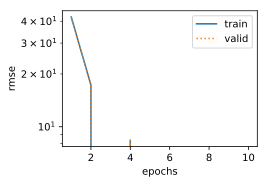

fold 0, train rmse 0.000000, valid rmse 0.000000
fold 1, train rmse 0.000000, valid rmse 0.000000
fold 2, train rmse 0.000000, valid rmse 0.000000
fold 3, train rmse 4.065372, valid rmse 4.065372
fold 4, train rmse 0.578632, valid rmse 0.578632
5-fold validation: avg train rmse 0.928801, avg valid rmse 0.928801


In [114]:
k, num_epochs, lr, weight_decay, batch_size = 5, 10, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print('%d-fold validation: avg train rmse %f, avg valid rmse %f'
      % (k, train_l, valid_l))

In [115]:
d2l.semilogy??